## Correlation Analysis

In [14]:
library('igraph')
packageVersion("igraph")

library("Hmisc")
packageVersion("Hmisc")

library("RColorBrewer")
packageVersion("RColorBrewer")

library("psych")
packageVersion("psych")

library("corrplot")
packageVersion("corrplot")


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] ‘1.2.4.1’

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units



[1] ‘4.2.0’

[1] ‘1.1.2’


Attaching package: ‘psych’

The following object is masked from ‘package:Hmisc’:

    describe

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



[1] ‘1.8.12’

corrplot 0.84 loaded


[1] ‘0.84’

### Relative MDF

In [6]:
rel.mdf.otu = read.csv("16S-rel-mdf.csv", header = TRUE)
mdf.taxa = read.csv("16S-mdf-taxa.csv", header = TRUE)

In [7]:
dim(rel.mdf.otu)
dim(mdf.taxa)

[1] 17 13

[1] 17  8

In [8]:
rownames(rel.mdf.otu) = rel.mdf.otu$X
rel.mdf.otu = rel.mdf.otu[, 2:13]

In [9]:
rownames(mdf.taxa) = mdf.taxa$X
mdf.taxa = mdf.taxa[, 2:8]

In [10]:
mdf.taxa

,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
ac09a700281e0e84b375bb5ae517a23e,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__Geobacillus,NA
896c05c0ef629cc4725eb1d8db95f2e5,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__Bacillus,NA
4921e77373cf88d5d939898928db7f1d,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,NA
af2a8d6190dac41427b5208bd79874e0,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,NA
04b867faf28bb8e9696ddab9bc9774a1,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,NA
3112a0cc9050d0bee3e65ae6ac080099,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Lactococcus,NA
6ba2d1f0e3b971b2afeb348b44f26b2d,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__[Tissierellaceae],g__Anaerococcus,NA
2424b82f393cce6b25e2f0fef86314f2,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,NA
f508a05c1f9bbdaefd0ec0ff6f5db60b,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Oxalobacteraceae,g__Massilia,NA


In [34]:
# log10(x+1) transformation
#rel.mdf = otu_table(p.rel.mdf)
rel.mdf = log10(rel.mdf.otu + 1)

In [39]:
# combine feature table with taxonomy
rel.mdf.w.taxa = cbind(rel.mdf, mdf.taxa)

In [40]:
rel.mdf.w.taxa

,T1R1,T1R4,T1R5,T2R1,T2R4,T2R5,T3R1,T3R5,T4R1,T5R1,T5R4,T5R5,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
ac09a700281e0e84b375bb5ae517a23e,1.1849561,1.1513505,0.6107504,0.000000,0.000000,0.000000,1.650793,0.000000,0.000000,0.0000000,0.0000000,0.0000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__Geobacillus,NA
896c05c0ef629cc4725eb1d8db95f2e5,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.932552,0.0000000,0.0000000,0.0000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__Bacillus,NA
4921e77373cf88d5d939898928db7f1d,0.5993390,0.4258170,0.7043229,0.000000,0.000000,1.563207,0.000000,1.535716,0.000000,0.0000000,1.0493304,1.0156276,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,NA
af2a8d6190dac41427b5208bd79874e0,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.4241554,1.5320339,0.9795459,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,NA
04b867faf28bb8e9696ddab9bc9774a1,0.0000000,0.7891375,0.1846424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,NA
3112a0cc9050d0bee3e65ae6ac080099,0.0000000,0.7200090,0.4967820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Lactococcus,NA
6ba2d1f0e3b971b2afeb348b44f26b2d,0.0000000,0.5595674,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.5358993,0.3501839,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__[Tissierellaceae],g__Anaerococcus,NA
2424b82f393cce6b25e2f0fef86314f2,1.1391647,1.1805032,0.6992426,1.639413,0.000000,1.239203,1.414973,0.000000,0.000000,1.7260930,1.2334008,0.8226507,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,NA
f508a05c1f9bbdaefd0ec0ff6f5db60b,0.3879254,0.0000000,0.4261817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Oxalobacteraceae,g__Massilia,NA


In [41]:
# Pearson correlation
cor.rel.mdf = rcorr(t(rel.mdf.w.taxa)[1:12,], type='pearson')

In [42]:
# extract significant values: abs(r)>0.3 & P < 0.05
indices.m = which(abs(cor.rel.mdf$r) > 0.3 & cor.rel.mdf$P < 0.05 & lower.tri(cor.rel.mdf$r),arr.ind=TRUE)
# order index by row, in the same order as graph edges
indices.m.by.row = indices.m[order(indices.m[,1]),]

sig.rel.mdf = cor.rel.mdf$r[indices.m.by.row]
length(sig.rel.mdf)

[1] 10

In [43]:
sig.rel.mdf

[1]  0.9215014 -0.5862198  0.7475874  0.5949603  0.9524653  0.6142226
 [7]  0.6255170  0.6353405  0.8039374  0.9700312

In [44]:
# set all other values to 0 because we only want to show significant edges on a correlation plot
cor.rel.mdf$r[which(abs(cor.rel.mdf$r) <= 0.3 & lower.tri(cor.rel.mdf$r), arr.ind=TRUE)]=0
cor.rel.mdf$r[which(cor.rel.mdf$P >= 0.05 & lower.tri(cor.rel.mdf$r), arr.ind=TRUE)]=0

In [45]:
# show vertex label in Genus level
v.names.r.m <- rel.mdf.w.taxa[,18]

In [48]:
v.names.r.m = as.vector(v.names.r.m)
is.vector(v.names.r.m)

[1] TRUE

In [47]:
unique(rel.mdf.w.taxa[,16])

[1] o__Bacillales       o__Lactobacillales  o__Clostridiales   
 [4] o__Pseudomonadales  o__Burkholderiales  o__Deinococcales   
 [7] o__Thermales        o__Actinomycetales  o__Sphingomonadales
[10] o__Caulobacterales  o__Rhizobiales     
11 Levels: o__Actinomycetales o__Bacillales ... o__Thermales

In [49]:
# color vertex according to Order level
colourCount = length(unique(rel.mdf.w.taxa[,16]))
getPalette = colorRampPalette(brewer.pal(8, "Set2"))
col.r.m = getPalette(colourCount)
my_color.r.m = col.r.m[as.numeric(as.factor(rel.mdf.w.taxa[,15]))]

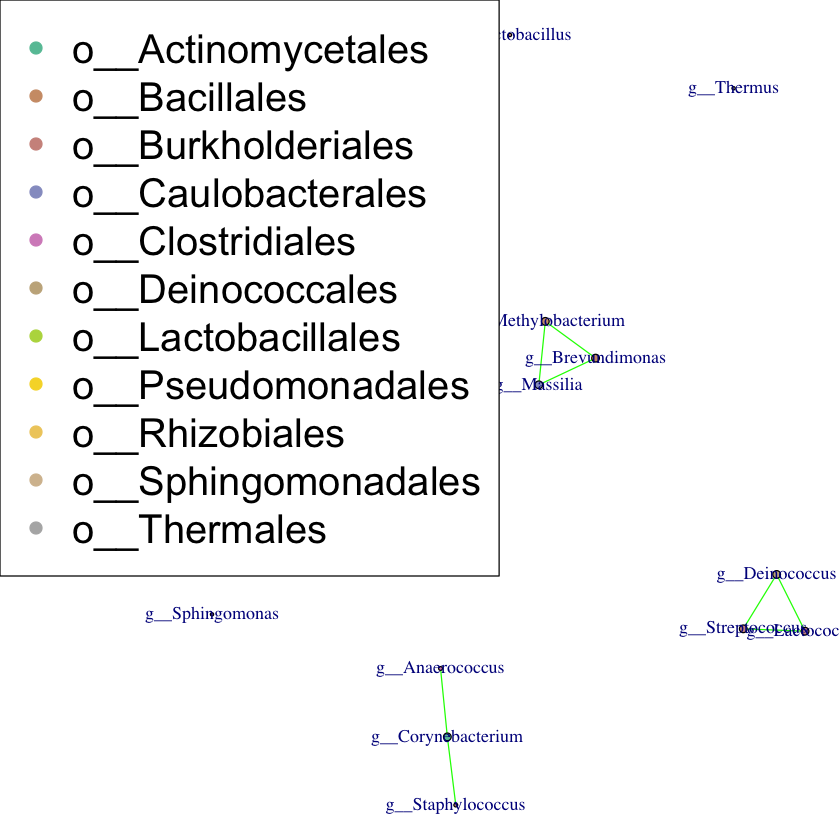

In [50]:
# create network graph from correlation matrix
nw.rel.mdf <- graph_from_adjacency_matrix(cor.rel.mdf$r, weighted=T, mode="lower", diag=F)
# only show vertexes that have significant values
V(nw.rel.mdf)$name <- v.names.r.m
V(nw.rel.mdf)$size <- degree(nw.rel.mdf)
E(nw.rel.mdf)$values <- sig.rel.mdf
# red for negative correlation, green for positive correlation
E(nw.rel.mdf)$color <- ifelse(E(nw.rel.mdf)$values > 0,'#00FF00','#FF0000')

par(bg="white", mar=c(0,0,0,0))
set.seed(123)
#pdf('rel_mdf_correlation_prevalent.pdf', width=20, height=20)
l.r.m <- layout_with_graphopt(nw.rel.mdf)
plot.igraph(nw.rel.mdf,
            layout=l.r.m, 
            vertex.label.cex=0.9,
            vertex.color=my_color.r.m)
legend(x="topleft", legend=levels(as.factor(rel.mdf.w.taxa[,16])), col = col.r.m, pch=20, cex = 1, text.col="black", horiz = F)
#dev.off()

### Relative Gypsum

In [27]:
rel.gyp.otu = read.csv("16S-rel-gyp.csv", header = TRUE)
gyp.taxa = read.csv("16S-gyp-taxa.csv", header = TRUE)

In [28]:
dim(rel.gyp.otu)
dim(gyp.taxa)

[1] 19 16

[1] 19  8

In [29]:
rownames(rel.gyp.otu) = rel.gyp.otu$X
rel.gyp.otu = rel.gyp.otu[, 2:16]

rownames(gyp.taxa) = gyp.taxa$X
gyp.taxa = gyp.taxa[, 2:8]

In [58]:
rel.gyp.otu

,T1R10,T1R7,T1R9,T2R10,T2R7,T2R9,T3R10,T3R7,T3R9,T4R10,T4R7,T4R9,T5R10,T5R7,T5R9
,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ac09a700281e0e84b375bb5ae517a23e,2.2052374,5.2884615,6.996487,0,0,0.0000000,0.00000,0,0.000000,0.00000,0.00000,0.0,0.000000,0.00000,0.000000
896c05c0ef629cc4725eb1d8db95f2e5,0.0000000,0.0000000,3.703162,100,100,71.2456747,48.35605,100,38.981702,26.43443,59.45946,21.9,17.320261,69.23077,22.641032
473b630262c9e46dc6f8f08886406faf,0.0000000,0.0000000,0.000000,0,0,1.6955017,0.00000,0,2.625298,0.00000,0.00000,0.0,1.416122,0.00000,0.000000
4921e77373cf88d5d939898928db7f1d,15.9754417,0.0000000,6.557377,0,0,0.0000000,0.00000,0,0.000000,0.00000,0.00000,0.0,0.000000,0.00000,0.000000
af2a8d6190dac41427b5208bd79874e0,0.0000000,3.2196970,0.000000,0,0,0.0000000,0.00000,0,0.000000,0.00000,0.00000,0.0,0.000000,0.00000,0.000000
04b867faf28bb8e9696ddab9bc9774a1,0.0000000,0.0000000,6.279274,0,0,0.0000000,0.00000,0,0.000000,0.00000,0.00000,0.0,0.000000,0.00000,0.000000
3112a0cc9050d0bee3e65ae6ac080099,0.0000000,1.1217949,0.000000,0,0,0.0000000,0.00000,0,0.000000,0.00000,0.00000,0.0,0.000000,0.00000,0.000000
2424b82f393cce6b25e2f0fef86314f2,31.3745145,18.3857809,30.620609,0,0,5.6747405,0.00000,0,11.853620,0.00000,0.00000,0.0,0.000000,0.00000,7.412092
f508a05c1f9bbdaefd0ec0ff6f5db60b,0.4636011,0.0000000,0.000000,0,0,0.0000000,0.00000,0,0.000000,0.00000,0.00000,0.0,0.000000,0.00000,0.000000


In [66]:
# log10(x+1) transformation
#rel.gyp <- otu_table(p.rel.gyp)
rel.gyp <- log10(rel.gyp.otu + 1)

In [67]:
# combine feature table with taxonomy
rel.gyp.w.taxa <- cbind(rel.gyp, gyp.taxa)

In [68]:
rel.gyp.w.taxa

,T1R10,T1R7,T1R9,T2R10,T2R7,T2R9,T3R10,T3R7,T3R9,T4R10,⋯,T5R10,T5R7,T5R9,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
ac09a700281e0e84b375bb5ae517a23e,0.5058602,0.7985444,0.9028992,0.000000,0.000000,0.00000000,0.000000,0.000000,0.0000000,0.000000,⋯,0.0000000,0.000000,0.0000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__Geobacillus,NA
896c05c0ef629cc4725eb1d8db95f2e5,0.0000000,0.0000000,0.6723899,2.004321,2.004321,1.85881185,1.693340,2.004321,1.6018613,1.438296,⋯,1.2629317,1.846527,1.3736664,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__Bacillus,NA
473b630262c9e46dc6f8f08886406faf,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.43063961,0.000000,0.000000,0.5593438,0.000000,⋯,0.3831189,0.000000,0.0000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Paenibacillaceae,g__Paenibacillus,NA
4921e77373cf88d5d939898928db7f1d,1.2298211,0.0000000,0.8783711,0.000000,0.000000,0.00000000,0.000000,0.000000,0.0000000,0.000000,⋯,0.0000000,0.000000,0.0000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,NA
af2a8d6190dac41427b5208bd79874e0,0.0000000,0.6252813,0.0000000,0.000000,0.000000,0.00000000,0.000000,0.000000,0.0000000,0.000000,⋯,0.0000000,0.000000,0.0000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,NA
04b867faf28bb8e9696ddab9bc9774a1,0.0000000,0.0000000,0.8620881,0.000000,0.000000,0.00000000,0.000000,0.000000,0.0000000,0.000000,⋯,0.0000000,0.000000,0.0000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,NA
3112a0cc9050d0bee3e65ae6ac080099,0.0000000,0.3267034,0.0000000,0.000000,0.000000,0.00000000,0.000000,0.000000,0.0000000,0.000000,⋯,0.0000000,0.000000,0.0000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Lactococcus,NA
2424b82f393cce6b25e2f0fef86314f2,1.5102033,1.2874833,1.4999702,0.000000,0.000000,0.82443438,0.000000,0.000000,1.1090254,0.000000,⋯,0.0000000,0.000000,0.9249040,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,NA
f508a05c1f9bbdaefd0ec0ff6f5db60b,0.1654227,0.0000000,0.0000000,0.000000,0.000000,0.00000000,0.000000,0.000000,0.0000000,0.000000,⋯,0.0000000,0.000000,0.0000000,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Oxalobacteraceae,g__Massilia,NA


In [69]:
# Pearson correlation
cor.rel.gyp <- rcorr(t(rel.gyp.w.taxa)[1:15,], type='pearson')

In [70]:
# extract significant values: abs(r)>0.3 & P < 0.05
indices = which(abs(cor.rel.gyp$r) > 0.3 & cor.rel.gyp$P < 0.05 & lower.tri(cor.rel.gyp$r),arr.ind=TRUE)
# order index by row, in the same order as graph edges
indices.by.row = indices[order(indices[,1]),]

sig.rel.gyp = cor.rel.gyp$r[indices.by.row]
length(sig.rel.gyp)

[1] 66

In [71]:
sig.rel.gyp

[1] -0.8394510  0.6662085 -0.6659563  0.5731364 -0.5769914  0.6649546
 [7]  0.5417012  0.5731364 -0.5769914  1.0000000  0.7560412 -0.7450674
[13]  0.6536792 -0.5769914  0.7997311  0.9093641 -0.6395048  0.6701019
[19]  0.6925087  0.6701019  0.5925581  0.6748804 -0.8261015  0.8255442
[25]  0.8255442  0.5657145  0.5209764  0.5616112 -0.8022901  0.6815885
[31]  0.5850924  0.8797289  0.8540103  0.5731364 -0.5769914  1.0000000
[37]  1.0000000  0.6701019  0.8255442  0.9287008 -0.9228112  0.7728770
[43]  0.5504373  0.5504373  0.7853464  0.6172196  0.7105789  0.8258672
[49]  0.8263916  0.5504373  0.5279765 -0.5769914  0.7997311  1.0000000
[55]  0.8797289  0.6172196  0.9102421 -0.6203698  0.6051491  0.7508538
[61]  0.6051491  0.5950663  0.9964410  0.6051491  0.6996150  0.7454537

In [54]:
#which(cor.rel.gyp$P == 'NaN')

In [72]:
# set all other values to 0 because we only want to show significant edges on a correlation plot
cor.rel.gyp$r[which(abs(cor.rel.gyp$r) <= 0.3 & lower.tri(cor.rel.gyp$r), arr.ind=TRUE)]=0
cor.rel.gyp$r[which(cor.rel.gyp$P >= 0.05 & lower.tri(cor.rel.gyp$r), arr.ind=TRUE)]=0

In [73]:
cor.rel.gyp$r[which(cor.rel.gyp$P == 'NaN' & lower.tri(cor.rel.gyp$r), arr.ind=TRUE)]=0

In [74]:
cor.rel.gyp$r

,ac09a700281e0e84b375bb5ae517a23e,896c05c0ef629cc4725eb1d8db95f2e5,473b630262c9e46dc6f8f08886406faf,4921e77373cf88d5d939898928db7f1d,af2a8d6190dac41427b5208bd79874e0,04b867faf28bb8e9696ddab9bc9774a1,3112a0cc9050d0bee3e65ae6ac080099,2424b82f393cce6b25e2f0fef86314f2,f508a05c1f9bbdaefd0ec0ff6f5db60b,92eb684563a59988b1e9cc61e7c6eaa1,157f6ba228fbb1d6d88977bcc75d3c63,4c6043796448a2d50aaf470a409f36f7,04f7a79aa778df478752a5e08bb5e68d,7e2c443c0ab5d9675d2e14bf13cdbab5,ba2bf0826df666849c91fc7512a57e78,0c00cc21bf4cb3fbc403e974cad42402,d1589540ef4c33b985e1103a5e0921f9,178902d35f055b7cc539fe7326a49c89,8f1d6c5f6a03b21a67f492d2004679fa
ac09a700281e0e84b375bb5ae517a23e,1.0000000,-0.8394510,-0.2383179,0.6662085,0.5731364,0.66495465,0.57313644,0.7560412,0.31561365,0.9093641,0.6748804,0.5616112,0.57313644,-0.24151318,0.9287008,-0.43222452,0.31561365,0.9102421,-0.31731249
896c05c0ef629cc4725eb1d8db95f2e5,-0.8394510,1.0000000,0.1481680,-0.6659563,-0.5769914,-0.29857669,-0.57699136,-0.7450674,-0.57699136,-0.6395048,-0.8261015,-0.8022901,-0.57699136,0.08445974,-0.9228112,0.13910735,-0.57699136,-0.6203698,-0.02763053
473b630262c9e46dc6f8f08886406faf,0.0000000,0.0000000,1.0000000,-0.1899306,-0.1314745,-0.13147447,-0.13147447,0.1888295,-0.13147447,-0.1929292,-0.1882372,-0.1828115,-0.13147447,-0.24524210,-0.2284842,0.52797654,-0.13147447,-0.1919936,0.40278303
4921e77373cf88d5d939898928db7f1d,0.6662085,-0.6659563,0.0000000,1.0000000,-0.1031871,0.54170122,-0.10318710,0.6536792,0.79973111,0.3284870,0.3631183,0.6815885,-0.10318710,-0.19247708,0.7728770,-0.34446696,0.79973111,0.3640330,-0.08047950
af2a8d6190dac41427b5208bd79874e0,0.5731364,-0.5769914,0.0000000,0.0000000,1.0000000,-0.07142857,1.00000000,0.3564164,-0.07142857,0.6701019,0.8255442,0.4114233,1.00000000,-0.13323722,0.5504373,-0.23844824,-0.07142857,0.6051491,-0.20502385
04b867faf28bb8e9696ddab9bc9774a1,0.6649546,0.0000000,0.0000000,0.5417012,0.0000000,1.00000000,-0.07142857,0.4498670,-0.07142857,0.6925087,-0.1022671,-0.0993194,-0.07142857,-0.13323722,0.4198924,-0.23844824,-0.07142857,0.7508538,-0.32194828
3112a0cc9050d0bee3e65ae6ac080099,0.5731364,-0.5769914,0.0000000,0.0000000,1.0000000,0.00000000,1.00000000,0.3564164,-0.07142857,0.6701019,0.8255442,0.4114233,1.00000000,-0.13323722,0.5504373,-0.23844824,-0.07142857,0.6051491,-0.20502385
2424b82f393cce6b25e2f0fef86314f2,0.7560412,-0.7450674,0.0000000,0.6536792,0.0000000,0.00000000,0.00000000,1.0000000,0.45436744,0.5925581,0.5657145,0.5850924,0.35641636,-0.11519923,0.7853464,-0.20786570,0.45436744,0.5950663,-0.10766098
f508a05c1f9bbdaefd0ec0ff6f5db60b,0.0000000,-0.5769914,0.0000000,0.7997311,0.0000000,0.00000000,0.00000000,0.0000000,1.00000000,-0.1048162,0.5039285,0.8797289,-0.07142857,-0.13323722,0.6172196,-0.23844824,1.00000000,-0.1043079,0.13444480
92eb684563a59988b1e9cc61e7c6eaa1,0.9093641,-0.6395048,0.0000000,0.0000000,0.6701019,0.69250872,0.67010191,0.5925581,0.00000000,1.0000000,0.5209764,0.2236542,0.67010191,-0.19551587,0.7105789,-0.34990535,-0.10481620,0.9964410,-0.38786914


In [75]:
# show vertex label in Genus level
v.names.r.g <- rel.gyp.w.taxa[,21]
v.names.r.g = as.vector(v.names.r.g)

In [76]:
# color vertex according to Order level
colourCount.g = length(unique(rel.gyp.w.taxa[,19]))
getPalette.g = colorRampPalette(brewer.pal(8, "Set2"))
col.r.g = getPalette.g(colourCount.g)
my_color.r.g = col.r.g[as.numeric(as.factor(rel.gyp.w.taxa[,19]))]

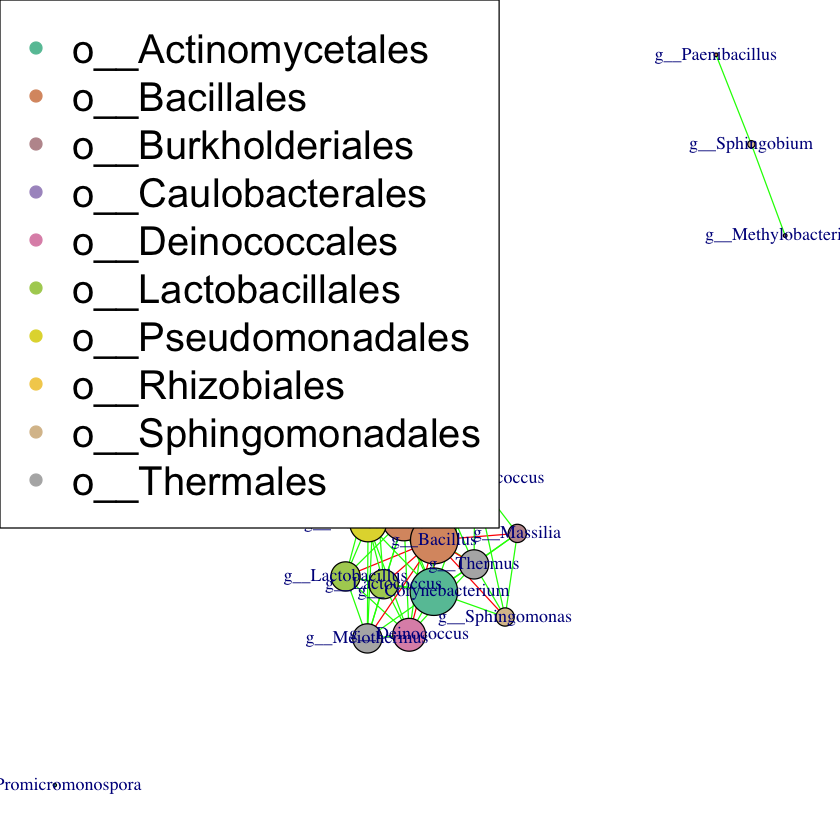

In [77]:
# create network graph from correlation matrix
nw.rel.gyp <- graph_from_adjacency_matrix(cor.rel.gyp$r, weighted=T, mode="lower", diag=F)
# only show vertexes that have significant values
V(nw.rel.gyp)$name <- v.names.r.g
V(nw.rel.gyp)$size <- degree(nw.rel.gyp)
E(nw.rel.gyp)$values <- sig.rel.gyp
# red for negative correlation, green for positive correlation
E(nw.rel.gyp)$color <- ifelse(E(nw.rel.gyp)$values > 0,'#00FF00','#FF0000')

par(bg="white", mar=c(0,0,0,0))
set.seed(333)
#pdf('rel_gyp_correlation_prevalent.pdf', width=20, height=20)
l.r.g <- layout_with_graphopt(nw.rel.gyp)
plot.igraph(nw.rel.gyp,
            layout=l.r.g, 
            vertex.label.cex=0.9,
            vertex.color=my_color.r.g)
legend(x="topleft", legend=levels(as.factor(rel.gyp.w.taxa[,19])), col = col.r.g, pch=20, cex = 1, text.col="black", horiz = F)
#dev.off()

### Quantitative MDF

In [1]:
quan.mdf.otu = read.csv("16S-quan-mdf.csv", header = TRUE)
dim(quan.mdf.otu)

[1] 17 13

In [3]:
rownames(quan.mdf.otu) = quan.mdf.otu$X
quan.mdf.otu = quan.mdf.otu[, 2:13]

In [4]:
quan.mdf.otu

,T1R1,T1R4,T1R5,T2R1,T2R4,T2R5,T3R1,T3R5,T4R1,T5R1,T5R4,T5R5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ac09a700281e0e84b375bb5ae517a23e,19013.027,3422.4709,1015.4330,0.000,0.000,0.0000,41111.76,0.00,0.000,0.00,0.000,0.000
896c05c0ef629cc4725eb1d8db95f2e5,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.00,0.00,33377.596,0.00,0.000,0.000
4921e77373cf88d5d939898928db7f1d,3952.953,432.8932,1338.8193,0.000,0.000,6860.9503,0.00,13819.08,0.000,0.00,22609.650,17734.512
af2a8d6190dac41427b5208bd79874e0,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.00,0.00,0.000,128265.01,73224.436,16169.702
04b867faf28bb8e9696ddab9bc9774a1,0.000,1339.3541,174.6286,0.000,0.000,0.0000,0.00,0.00,0.000,0.00,0.000,0.000
3112a0cc9050d0bee3e65ae6ac080099,0.000,1104.0229,704.9822,0.000,0.000,0.0000,0.00,0.00,0.000,0.00,0.000,0.000
6ba2d1f0e3b971b2afeb348b44f26b2d,0.000,682.7510,0.0000,0.000,0.000,0.0000,0.00,0.00,0.000,0.00,5395.485,2347.215
2424b82f393cce6b25e2f0fef86314f2,16977.425,3678.1394,1319.4162,8462.817,0.000,3152.3285,23492.43,0.00,0.000,262106.77,35712.971,10692.868
f508a05c1f9bbdaefd0ec0ff6f5db60b,1917.351,0.0000,549.7567,0.000,0.000,0.0000,0.00,0.00,0.000,0.00,0.000,0.000


In [5]:
# log10(x+1) transformation
quan.mdf <- log10(quan.mdf.otu + 1)

In [11]:
# combine feature table with taxonomy
quan.mdf.w.taxa <- cbind(quan.mdf, mdf.taxa)

In [12]:
quan.mdf.w.taxa

,T1R1,T1R4,T1R5,T2R1,T2R4,T2R5,T3R1,T3R5,T4R1,T5R1,T5R4,T5R5,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
ac09a700281e0e84b375bb5ae517a23e,4.279074,3.534467,3.007079,0.000000,0.000000,0.000000,4.613977,0.000000,0.000000,0.000000,0.000000,0.000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__Geobacillus,NA
896c05c0ef629cc4725eb1d8db95f2e5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.523468,0.000000,0.000000,0.000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__Bacillus,NA
4921e77373cf88d5d939898928db7f1d,3.597031,2.637383,3.127046,0.000000,0.000000,3.836448,0.000000,4.140511,0.000000,0.000000,4.354313,4.248844,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,NA
af2a8d6190dac41427b5208bd79874e0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.108112,4.864662,4.208729,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,NA
04b867faf28bb8e9696ddab9bc9774a1,0.000000,3.127220,2.244595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,NA
3112a0cc9050d0bee3e65ae6ac080099,0.000000,3.043371,2.848794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Lactococcus,NA
6ba2d1f0e3b971b2afeb348b44f26b2d,0.000000,2.834898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.732111,3.370738,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__[Tissierellaceae],g__Anaerococcus,NA
2424b82f393cce6b25e2f0fef86314f2,4.229897,3.565746,3.120711,3.927566,0.000000,3.498769,4.370946,0.000000,0.000000,5.418480,4.552838,4.029135,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,NA
f508a05c1f9bbdaefd0ec0ff6f5db60b,3.282928,0.000000,2.740960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Oxalobacteraceae,g__Massilia,NA


In [15]:
# Pearson correlation
cor.quan.mdf <- rcorr(t(quan.mdf.w.taxa)[1:12,], type='pearson')

In [16]:
# extract significant values: abs(r)>0.3 & P < 0.05
indices.q.m = which(abs(cor.quan.mdf$r) > 0.3 & cor.quan.mdf$P < 0.05 & lower.tri(cor.quan.mdf$r),arr.ind=TRUE)
# order index by row, in the same order as graph edges
indices.q.m.by.row = indices.q.m[order(indices.q.m[,1]),]

sig.quan.mdf = cor.quan.mdf$r[indices.q.m.by.row]
length(sig.quan.mdf)

[1] 12

In [17]:
sig.quan.mdf

[1]  0.9899458  0.5773651  0.5792658 -0.6545045  0.7407024  0.8004207
 [7]  0.7151052  0.7676832  0.7433873  0.5849469  0.9845169  0.8491219

In [18]:
# set all other values to 0 because we only want to show significant edges on a correlation plot
cor.quan.mdf$r[which(abs(cor.quan.mdf$r) <= 0.3 & lower.tri(cor.quan.mdf$r), arr.ind=TRUE)]=0
cor.quan.mdf$r[which(cor.quan.mdf$P >= 0.05 & lower.tri(cor.quan.mdf$r), arr.ind=TRUE)]=0

In [24]:
# show vertex label in Genus level
v.names.q.m <- as.vector(quan.mdf.w.taxa[,18])

In [21]:
# color vertex according to Order level
colourCount.q.m = length(unique(quan.mdf.w.taxa[,16]))
getPalette.q.m = colorRampPalette(brewer.pal(8, "Set2"))
col.q.m = getPalette.q.m(colourCount.q.m)
my_color.q.m = col.q.m[as.numeric(as.factor(quan.mdf.w.taxa[,16]))]

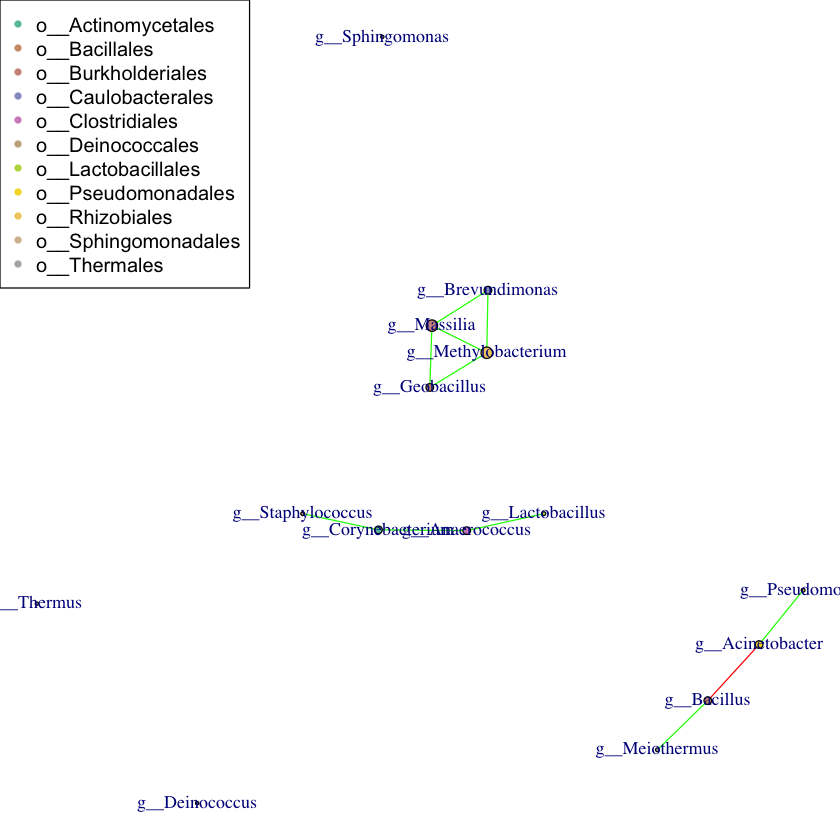

In [26]:
# create network graph from correlation matrix
nw.quan.mdf <- graph_from_adjacency_matrix(cor.quan.mdf$r, weighted=T, mode="lower", diag=F)
# only show vertexes that have significant values
V(nw.quan.mdf)$name <- v.names.q.m
V(nw.quan.mdf)$size <- degree(nw.quan.mdf)
E(nw.quan.mdf)$values <- sig.quan.mdf
# red for negative correlation, green for positive correlation
E(nw.quan.mdf)$color <- ifelse(E(nw.quan.mdf)$values > 0,'#00FF00','#FF0000')

par(bg="white", mar=c(0,0,0,0))
set.seed(333)
#pdf('quan_mdf_correlation_prevalent.pdf', width=20, height=20)
l.q.m <- layout_with_graphopt(nw.quan.mdf)
plot.igraph(nw.quan.mdf,
            layout=l.q.m, 
            vertex.label.cex=0.9,
            vertex.color=my_color.q.m)
legend(x="topleft", legend=levels(as.factor(quan.mdf.w.taxa[,16])), col = col.q.m, pch=20, cex = 1, text.col="black", horiz = F)
#dev.off()

### Quantitative Gypsum

In [30]:
quan.gyp.otu = read.csv("16S-quan-gyp.csv", header = TRUE)
dim(quan.gyp.otu)

[1] 19 16

In [32]:
rownames(quan.gyp.otu) = quan.gyp.otu$X
quan.gyp.otu = quan.gyp.otu[, 2:16]

In [33]:
quan.gyp.otu

,T1R10,T1R7,T1R9,T2R10,T2R7,T2R9,T3R10,T3R7,T3R9,T4R10,T4R7,T4R9,T5R10,T5R7,T5R9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ac09a700281e0e84b375bb5ae517a23e,10598.080,7788.106,7727.585,0.0,0.00,0.0000,0.0,0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
896c05c0ef629cc4725eb1d8db95f2e5,0.000,0.000,4090.123,204769.9,63732.76,360168.8043,412012.4,420760,186279.19,200576.6,331858.6,243266.6,140007.41,698137.9,201325.45
473b630262c9e46dc6f8f08886406faf,0.000,0.000,0.000,0.0,0.00,8571.2829,0.0,0,12545.33,0.0,0.0,0.0,11447.15,0.0,0.00
4921e77373cf88d5d939898928db7f1d,76775.866,0.000,7242.590,0.0,0.00,0.0000,0.0,0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
af2a8d6190dac41427b5208bd79874e0,0.000,4741.519,0.000,0.0,0.00,0.0000,0.0,0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
04b867faf28bb8e9696ddab9bc9774a1,0.000,0.000,6935.427,0.0,0.00,0.0000,0.0,0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
3112a0cc9050d0bee3e65ae6ac080099,0.000,1652.022,0.000,0.0,0.00,0.0000,0.0,0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
2424b82f393cce6b25e2f0fef86314f2,150781.779,27076.004,33820.309,0.0,0.00,28687.5590,0.0,0,56644.08,0.0,0.0,0.0,0.00,0.0,65908.78
f508a05c1f9bbdaefd0ec0ff6f5db60b,2228.006,0.000,0.000,0.0,0.00,0.0000,0.0,0,0.00,0.0,0.0,0.0,0.00,0.0,0.00


In [34]:
# log10(x+1) transformation
quan.gyp <- log10(quan.gyp.otu + 1)

In [35]:
# combine feature table with taxonomy
quan.gyp.w.taxa <- cbind(quan.gyp, gyp.taxa)

In [36]:
quan.gyp.w.taxa

,T1R10,T1R7,T1R9,T2R10,T2R7,T2R9,T3R10,T3R7,T3R9,T4R10,⋯,T5R10,T5R7,T5R9,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
ac09a700281e0e84b375bb5ae517a23e,4.025268,3.891488,3.888100,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__Geobacillus,NA
896c05c0ef629cc4725eb1d8db95f2e5,0.000000,0.000000,3.611843,5.311268,4.80437,5.556507,5.614911,5.624035,5.270167,5.302283,⋯,5.146154,5.843942,5.303901,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__Bacillus,NA
473b630262c9e46dc6f8f08886406faf,0.000000,0.000000,0.000000,0.000000,0.00000,3.933096,0.000000,0.000000,4.098517,0.000000,⋯,4.058735,0.000000,0.000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Paenibacillaceae,g__Paenibacillus,NA
4921e77373cf88d5d939898928db7f1d,4.885230,0.000000,3.859954,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,NA
af2a8d6190dac41427b5208bd79874e0,0.000000,3.676009,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,NA
04b867faf28bb8e9696ddab9bc9774a1,0.000000,0.000000,3.841136,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,NA
3112a0cc9050d0bee3e65ae6ac080099,0.000000,3.218279,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Lactococcus,NA
2424b82f393cce6b25e2f0fef86314f2,5.178352,4.432601,4.529190,0.000000,0.00000,4.457709,0.000000,0.000000,4.753162,0.000000,⋯,0.000000,0.000000,4.818950,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,NA
f508a05c1f9bbdaefd0ec0ff6f5db60b,3.348111,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Oxalobacteraceae,g__Massilia,NA


In [37]:
# Pearson correlation
cor.quan.gyp <- rcorr(t(quan.gyp.w.taxa)[1:15,], type='pearson')

Warning message in sqrt(1 - h * h):
“NaNs produced”

In [38]:
# extract significant values: abs(r)>0.3 & P < 0.05
indices.q.g = which(abs(cor.quan.gyp$r) > 0.3 & cor.quan.gyp$P < 0.05 & lower.tri(cor.quan.gyp$r),arr.ind=TRUE)
# order index by row, in the same order as graph edges
indices.q.g.by.row = indices.q.g[order(indices.q.g[,1]),]

sig.quan.gyp = cor.quan.gyp$r[indices.q.g.by.row]
length(sig.quan.gyp)

[1] 63

In [39]:
sig.quan.gyp

[1] -0.9069865  0.7855487 -0.6211116  0.5270555 -0.6563809  0.5264803
 [7]  0.5845928  0.5270555 -0.6563809  1.0000000  0.6158551 -0.5695684
[13]  0.5497676 -0.6563809  0.7674978  0.7730494 -0.5847443  0.6886572
[19]  0.6740452  0.6886572  0.7902917 -0.9632503  0.6736353  0.6736353
[25]  0.6890593  0.7841773 -0.9532729  0.5674918  0.5689396  0.5689396
[31]  0.7796402  0.9910487  0.5270555 -0.6563809  1.0000000  0.6886572
[37]  0.6736353  0.5689396  0.9149060 -0.8479805  0.7333055  0.7189403
[43]  0.5687015  0.6577119  0.7662302  0.7668733  0.5210571  0.5497676
[49] -0.6563809  0.7674978  1.0000000  0.6890593  0.7796402  0.5687015
[55]  0.7730704 -0.5792845  0.6774043  0.6853459  0.6774043  0.9998813
[61]  0.6774043  0.6571730  0.7225858

In [40]:
# set all other values to 0 because we only want to show significant edges on a correlation plot
cor.quan.gyp$r[which(abs(cor.quan.gyp$r) <= 0.3 & lower.tri(cor.quan.gyp$r), arr.ind=TRUE)]=0
cor.quan.gyp$r[which(cor.quan.gyp$P >= 0.05 & lower.tri(cor.quan.gyp$r), arr.ind=TRUE)]=0

In [41]:
# show vertex label in Genus level
v.names.q.g <- as.vector(quan.gyp.w.taxa[,21])

In [42]:
# color vertex according to Order level
colourCount.q.g = length(unique(quan.gyp.w.taxa[,19]))
getPalette.q.g = colorRampPalette(brewer.pal(8, "Set2"))
col.q.g = getPalette.q.g(colourCount.q.g)
my_color.q.g = col.q.g[as.numeric(as.factor(quan.gyp.w.taxa[,19]))]

Warning message in eattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”

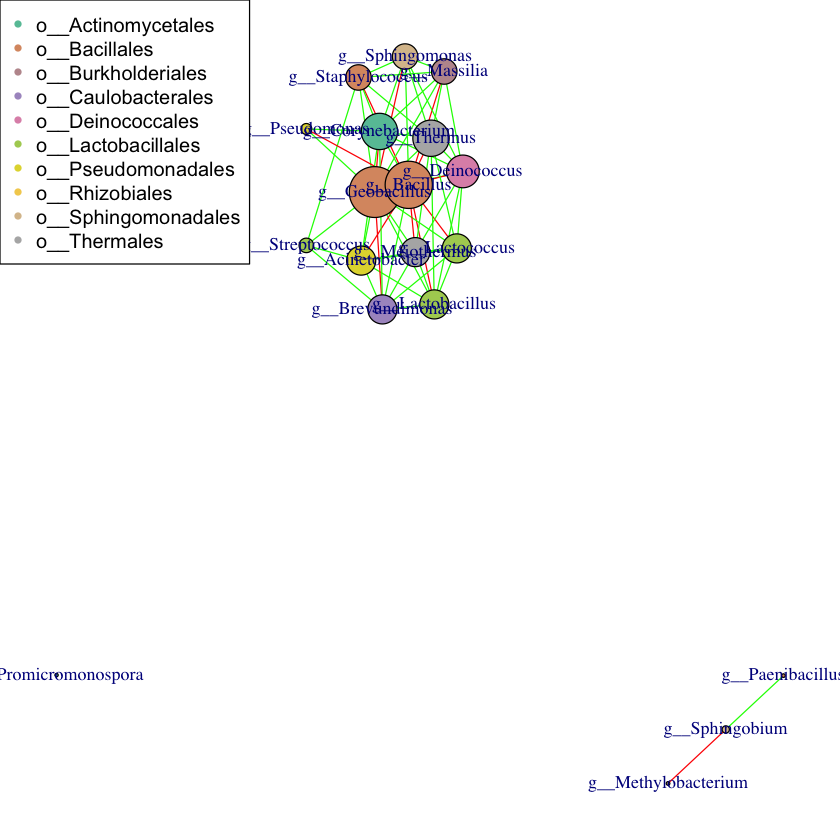

In [43]:
# create network graph from correlation matrix
nw.quan.gyp <- graph_from_adjacency_matrix(cor.quan.gyp$r, weighted=T, mode="lower", diag=F)
# only show vertexes that have significant values
V(nw.quan.gyp)$name <- v.names.q.g
V(nw.quan.gyp)$size <- degree(nw.quan.gyp)
E(nw.quan.gyp)$values <- sig.quan.gyp
# red for negative correlation, green for positive correlation
E(nw.quan.gyp)$color <- ifelse(E(nw.quan.gyp)$values > 0,'#00FF00','#FF0000')

par(bg="white", mar=c(0,0,0,0))
set.seed(123)
#pdf('quan_gyp_correlation_prevalent.pdf', width=20, height=20)
l.q.g <- layout_with_graphopt(nw.quan.gyp)
plot.igraph(nw.quan.gyp,
            layout=l.q.g, 
            vertex.label.cex=0.9,
            vertex.color=my_color.q.g)
legend(x="topleft", legend=levels(as.factor(quan.gyp.w.taxa[,19])), col = col.q.g, pch=20, cex = 1, text.col="black", horiz = F)
#dev.off()

## Correlation Matrix Visualization, RMP VS QMP

### MDF (17 taxa)

In [56]:
cor.rel.mdf$r

,ac09a700281e0e84b375bb5ae517a23e,896c05c0ef629cc4725eb1d8db95f2e5,4921e77373cf88d5d939898928db7f1d,af2a8d6190dac41427b5208bd79874e0,04b867faf28bb8e9696ddab9bc9774a1,3112a0cc9050d0bee3e65ae6ac080099,6ba2d1f0e3b971b2afeb348b44f26b2d,2424b82f393cce6b25e2f0fef86314f2,f508a05c1f9bbdaefd0ec0ff6f5db60b,92eb684563a59988b1e9cc61e7c6eaa1,157f6ba228fbb1d6d88977bcc75d3c63,4c6043796448a2d50aaf470a409f36f7,04f7a79aa778df478752a5e08bb5e68d,ba2bf0826df666849c91fc7512a57e78,d1589540ef4c33b985e1103a5e0921f9,178902d35f055b7cc539fe7326a49c89,8f1d6c5f6a03b21a67f492d2004679fa
ac09a700281e0e84b375bb5ae517a23e,1,-0.1984608,-0.2502302,-0.37187715,0.42290974,0.41236963,0.0604845,0.29113302,0.38455233,0.14992771,0.210359097,0.39430960,-0.15848300,-0.19006473,-0.19894621,0.41530600,0.440835032
896c05c0ef629cc4725eb1d8db95f2e5,0,1.0000000,-0.2995697,-0.17034607,-0.11150164,-0.13219687,-0.1698555,-0.46430987,-0.13466167,-0.58621984,-0.133116680,-0.20139300,0.95246533,-0.21434271,-0.19791328,-0.09090909,-0.112382091
4921e77373cf88d5d939898928db7f1d,0,0.0000000,1.0000000,0.08481192,-0.06128907,-0.02648373,0.2195986,-0.15087874,0.06168298,-0.13312363,0.256773112,-0.23005581,-0.27294154,0.61422254,0.15890456,0.01298119,0.029405477
af2a8d6190dac41427b5208bd79874e0,0,0.0000000,0.0000000,1.00000000,-0.20893253,-0.24771140,0.4631055,0.36219949,-0.25232996,-0.02571729,-0.249434942,0.13975818,-0.21909731,0.31151859,-0.19173839,-0.17034607,-0.210582329
04b867faf28bb8e9696ddab9bc9774a1,0,0.0000000,0.0000000,0.00000000,1.00000000,0.92150138,0.5758493,0.10144530,0.03157071,-0.03787950,0.747587415,0.49845519,-0.06579965,0.22315400,0.18110404,-0.11150164,-0.075936374
3112a0cc9050d0bee3e65ae6ac080099,0,0.0000000,0.0000000,0.00000000,0.92150138,1.00000000,0.4318707,0.04342551,0.30640917,0.09818769,0.594960271,0.47602775,0.02810024,0.13459673,0.07912893,-0.13219687,-0.005397162
6ba2d1f0e3b971b2afeb348b44f26b2d,0,0.0000000,0.0000000,0.00000000,0.00000000,0.00000000,1.0000000,0.17722398,-0.25160335,-0.03901845,0.414027793,0.11284500,-0.21846640,0.62551701,0.11243421,-0.16985555,-0.209975938
2424b82f393cce6b25e2f0fef86314f2,0,0.0000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000,1.00000000,-0.01166905,0.38689086,0.206617765,0.39394214,-0.48976610,-0.25127618,-0.22306828,0.10777742,0.079330266
f508a05c1f9bbdaefd0ec0ff6f5db60b,0,0.0000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,1.00000000,0.35256932,-0.197182861,0.41369010,0.08558363,-0.26708228,-0.29316466,0.63534037,0.803937358
92eb684563a59988b1e9cc61e7c6eaa1,0,-0.5862198,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,1.00000000,-0.009903294,0.03174828,-0.47253562,-0.39212017,0.37385266,0.13276124,0.213177390


In [57]:
cor.quan.mdf$r

,ac09a700281e0e84b375bb5ae517a23e,896c05c0ef629cc4725eb1d8db95f2e5,4921e77373cf88d5d939898928db7f1d,af2a8d6190dac41427b5208bd79874e0,04b867faf28bb8e9696ddab9bc9774a1,3112a0cc9050d0bee3e65ae6ac080099,6ba2d1f0e3b971b2afeb348b44f26b2d,2424b82f393cce6b25e2f0fef86314f2,f508a05c1f9bbdaefd0ec0ff6f5db60b,92eb684563a59988b1e9cc61e7c6eaa1,157f6ba228fbb1d6d88977bcc75d3c63,4c6043796448a2d50aaf470a409f36f7,04f7a79aa778df478752a5e08bb5e68d,ba2bf0826df666849c91fc7512a57e78,d1589540ef4c33b985e1103a5e0921f9,178902d35f055b7cc539fe7326a49c89,8f1d6c5f6a03b21a67f492d2004679fa
ac09a700281e0e84b375bb5ae517a23e,1.0000000,-0.2090874,0.01792438,-0.3986598,0.4812215,0.4802929,-0.0858159,0.31634210,0.5792659,0.25903329,0.143578712,0.453195562,-0.01041308,-0.141127303,-0.20070345,0.48651919,0.5849469
896c05c0ef629cc4725eb1d8db95f2e5,0.0000000,1.0000000,-0.34648322,-0.1733332,-0.1327075,-0.1347518,-0.1726584,-0.49837551,-0.1341898,-0.65450449,-0.134492759,-0.207168181,0.80042077,-0.241872240,-0.21177920,-0.09090909,-0.1297939
4921e77373cf88d5d939898928db7f1d,0.0000000,0.0000000,1.00000000,0.1811581,0.1591421,0.1692297,0.5074260,0.12865906,0.2889557,0.02910982,0.245595311,-0.005643679,-0.20317015,0.715105171,0.17889225,0.23003275,0.2884723
af2a8d6190dac41427b5208bd79874e0,0.0000000,0.0000000,0.00000000,1.0000000,-0.2530288,-0.2569267,0.5773652,0.51237372,-0.2558551,0.37421826,-0.256432700,0.149672198,-0.25255913,0.389884213,-0.01744327,-0.17333322,-0.2474735
04b867faf28bb8e9696ddab9bc9774a1,0.0000000,0.0000000,0.00000000,0.0000000,1.0000000,0.9899458,0.2502341,0.07615987,0.2510341,0.06020132,0.534447447,0.454788440,0.20717052,0.280708366,0.15293130,-0.13270751,0.1634616
3112a0cc9050d0bee3e65ae6ac080099,0.0000000,0.0000000,0.00000000,0.0000000,0.9899458,1.0000000,0.1965812,0.07027955,0.3261921,0.08037483,0.459010979,0.452561754,0.27425335,0.265837028,0.10238156,-0.13475183,0.2222778
6ba2d1f0e3b971b2afeb348b44f26b2d,0.0000000,0.0000000,0.00000000,0.5773652,0.0000000,0.0000000,1.0000000,0.31992953,-0.2548590,0.24284177,0.210462337,-0.090948132,-0.25157586,0.767683210,0.33221329,-0.17265840,-0.2465100
2424b82f393cce6b25e2f0fef86314f2,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,1.00000000,0.1600633,0.74070232,0.114457222,0.443083122,-0.42018067,-0.008046516,-0.13709954,0.19064954,0.1763652
f508a05c1f9bbdaefd0ec0ff6f5db60b,0.5792659,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,1.0000000,0.25759182,-0.198523154,0.545346524,0.24551096,-0.142557991,-0.31260474,0.74338733,0.9845169
92eb684563a59988b1e9cc61e7c6eaa1,0.0000000,-0.6545045,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.74070232,0.0000000,1.00000000,-0.005892045,0.307049790,-0.46555666,-0.122373614,0.25089523,0.18963620,0.2531175


In [58]:
mdf.rel.quan = lowerUpper(t(cor.rel.mdf$r), cor.quan.mdf$r)

In [59]:
mdf.rel.quan

,ac09a700281e0e84b375bb5ae517a23e,896c05c0ef629cc4725eb1d8db95f2e5,4921e77373cf88d5d939898928db7f1d,af2a8d6190dac41427b5208bd79874e0,04b867faf28bb8e9696ddab9bc9774a1,3112a0cc9050d0bee3e65ae6ac080099,6ba2d1f0e3b971b2afeb348b44f26b2d,2424b82f393cce6b25e2f0fef86314f2,f508a05c1f9bbdaefd0ec0ff6f5db60b,92eb684563a59988b1e9cc61e7c6eaa1,157f6ba228fbb1d6d88977bcc75d3c63,4c6043796448a2d50aaf470a409f36f7,04f7a79aa778df478752a5e08bb5e68d,ba2bf0826df666849c91fc7512a57e78,d1589540ef4c33b985e1103a5e0921f9,178902d35f055b7cc539fe7326a49c89,8f1d6c5f6a03b21a67f492d2004679fa
ac09a700281e0e84b375bb5ae517a23e,NA,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0,0.5792659,0.0000000,0,0,0.0000000,0.0000000,0,0.0000000,0.5849469
896c05c0ef629cc4725eb1d8db95f2e5,0,NA,0.0000000,0,0.0000000,0.0000000,0.0000000,0,0.0000000,-0.6545045,0,0,0.8004208,0.0000000,0,0.0000000,0.0000000
4921e77373cf88d5d939898928db7f1d,0,0.0000000,NA,0,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0,0,0.0000000,0.7151052,0,0.0000000,0.0000000
af2a8d6190dac41427b5208bd79874e0,0,0.0000000,0.0000000,NA,0.0000000,0.0000000,0.5773652,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0.0000000,0.0000000
04b867faf28bb8e9696ddab9bc9774a1,0,0.0000000,0.0000000,0,NA,0.9899458,0.0000000,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0.0000000,0.0000000
3112a0cc9050d0bee3e65ae6ac080099,0,0.0000000,0.0000000,0,0.9215014,NA,0.0000000,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0.0000000,0.0000000
6ba2d1f0e3b971b2afeb348b44f26b2d,0,0.0000000,0.0000000,0,0.0000000,0.0000000,NA,0,0.0000000,0.0000000,0,0,0.0000000,0.7676832,0,0.0000000,0.0000000
2424b82f393cce6b25e2f0fef86314f2,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,NA,0.0000000,0.7407023,0,0,0.0000000,0.0000000,0,0.0000000,0.0000000
f508a05c1f9bbdaefd0ec0ff6f5db60b,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0,NA,0.0000000,0,0,0.0000000,0.0000000,0,0.7433873,0.9845169
92eb684563a59988b1e9cc61e7c6eaa1,0,-0.5862198,0.0000000,0,0.0000000,0.0000000,0.0000000,0,0.0000000,NA,0,0,0.0000000,0.0000000,0,0.0000000,0.0000000


In [60]:
label.genus = tax_table(p.rel.mdf)[,6]
label.genus = as.character(label.genus)
length(label.genus)

[1] 17

In [61]:
rownames(mdf.rel.quan) = label.genus
colnames(mdf.rel.quan) = label.genus

In [63]:
pdf('mdf_correlation_matrix.pdf', width=30, height=30)
corrplot(mdf.rel.quan, method="circle", tl.col="black", na.label="square", na.label.col="gray", tl.srt=45, tl.cex=2.0)
dev.off()

pdf 
  2

### GYP (19 taxa)

In [64]:
gyp.rel.quan = lowerUpper(t(cor.rel.gyp$r), cor.quan.gyp$r)

In [65]:
gyp.rel.quan

,ac09a700281e0e84b375bb5ae517a23e,896c05c0ef629cc4725eb1d8db95f2e5,473b630262c9e46dc6f8f08886406faf,4921e77373cf88d5d939898928db7f1d,af2a8d6190dac41427b5208bd79874e0,04b867faf28bb8e9696ddab9bc9774a1,3112a0cc9050d0bee3e65ae6ac080099,2424b82f393cce6b25e2f0fef86314f2,f508a05c1f9bbdaefd0ec0ff6f5db60b,92eb684563a59988b1e9cc61e7c6eaa1,157f6ba228fbb1d6d88977bcc75d3c63,4c6043796448a2d50aaf470a409f36f7,04f7a79aa778df478752a5e08bb5e68d,7e2c443c0ab5d9675d2e14bf13cdbab5,ba2bf0826df666849c91fc7512a57e78,0c00cc21bf4cb3fbc403e974cad42402,d1589540ef4c33b985e1103a5e0921f9,178902d35f055b7cc539fe7326a49c89,8f1d6c5f6a03b21a67f492d2004679fa
ac09a700281e0e84b375bb5ae517a23e,NA,-0.9069865,0.0000000,0.7855487,0.5270555,0.5264803,0.5270555,0.6158551,0.5497676,0.7730493,0.7902917,0.7841773,0.5270555,0,0.9149060,0.0000000,0.5497676,0.7730704,0.0000000
896c05c0ef629cc4725eb1d8db95f2e5,-0.8394510,NA,0.0000000,-0.6211117,-0.6563809,0.0000000,-0.6563809,-0.5695684,-0.6563809,-0.5847443,-0.9632503,-0.9532729,-0.6563809,0,-0.8479805,0.0000000,-0.6563809,-0.5792845,0.0000000
473b630262c9e46dc6f8f08886406faf,0.0000000,0.0000000,NA,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.5210570,0.0000000,0.0000000,0.0000000
4921e77373cf88d5d939898928db7f1d,0.6662085,-0.6659563,0.0000000,NA,0.0000000,0.5845928,0.0000000,0.0000000,0.7674979,0.0000000,0.0000000,0.5674919,0.0000000,0,0.7333054,0.0000000,0.7674979,0.0000000,0.0000000
af2a8d6190dac41427b5208bd79874e0,0.5731364,-0.5769913,0.0000000,0.0000000,NA,0.0000000,1.0000000,0.0000000,0.0000000,0.6886572,0.6736353,0.5689396,1.0000000,0,0.0000000,0.0000000,0.0000000,0.6774043,0.0000000
04b867faf28bb8e9696ddab9bc9774a1,0.6649547,0.0000000,0.0000000,0.5417012,0.0000000,NA,0.0000000,0.0000000,0.0000000,0.6740452,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.6853459,0.0000000
3112a0cc9050d0bee3e65ae6ac080099,0.5731364,-0.5769913,0.0000000,0.0000000,1.0000000,0.0000000,NA,0.0000000,0.0000000,0.6886572,0.6736353,0.5689396,1.0000000,0,0.0000000,0.0000000,0.0000000,0.6774043,0.0000000
2424b82f393cce6b25e2f0fef86314f2,0.7560412,-0.7450674,0.0000000,0.6536792,0.0000000,0.0000000,0.0000000,NA,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0.7189403,0.0000000,0.0000000,0.0000000,0.0000000
f508a05c1f9bbdaefd0ec0ff6f5db60b,0.0000000,-0.5769913,0.0000000,0.7997311,0.0000000,0.0000000,0.0000000,0.0000000,NA,0.0000000,0.6890593,0.7796402,0.0000000,0,0.5687014,0.0000000,1.0000000,0.0000000,0.0000000
92eb684563a59988b1e9cc61e7c6eaa1,0.9093641,-0.6395048,0.0000000,0.0000000,0.6701019,0.6925087,0.6701019,0.5925581,0.0000000,NA,0.0000000,0.0000000,0.6886572,0,0.6577120,0.0000000,0.0000000,0.9998813,0.0000000


In [66]:
quan.label.genus = tax_table(p.rel.gyp)[,6]
quan.label.genus = as.character(quan.label.genus)

In [67]:
quan.label.genus

[1] "g__Geobacillus"       "g__Bacillus"          "g__Paenibacillus"    
 [4] "g__Staphylococcus"    "g__Lactobacillus"     "g__Streptococcus"    
 [7] "g__Lactococcus"       "g__Pseudomonas"       "g__Massilia"         
[10] "g__Acinetobacter"     "g__Deinococcus"       "g__Thermus"          
[13] "g__Meiothermus"       "g__Promicromonospora" "g__Corynebacterium"  
[16] "g__Sphingobium"       "g__Sphingomonas"      "g__Brevundimonas"    
[19] "g__Methylobacterium"

In [68]:
rownames(gyp.rel.quan) = quan.label.genus
colnames(gyp.rel.quan) = quan.label.genus

In [71]:
pdf('gyp_correlation_matrix.pdf', width=30, height=30)
corrplot(gyp.rel.quan, method="circle", tl.col="black", na.label="square", na.label.col="gray", tl.srt=45, tl.cex=2.0)
dev.off()

pdf 
  2